# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 After going through the data, we can see that more unique male mice were used compared to females. For the drug regimen, we can see that Capomulin and Ramicane had higher numbers while Propriva had the lowest numbers. Infubinol and Ceftamine had a higher volume of tumor for treatments for each group, we can also see that Capomulin had a significant decrease in mouse 1509 after 35 days of use. Another observation that was made includes the increase in size of tumor based on the increase in weight for Capomulin. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(study_results, mouse_metadata, how = "left", on = "Mouse ID")

# Display the data table for preview
mouse_study.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [2]:
# Checking the number of mice.
len(mouse_study["Mouse ID"].unique())


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#duplicate_mouse_ID = mouse_study[mouse_study.duplicated(subset=["Mouse ID", "Timepoint"],keep=False)]
duplicate_mouse_id = mouse_study.loc[mouse_study.duplicated(subset = ["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
#Duplicated_mouse_ID = duplicated_mouse["Mouse ID"
duplicate_mouse_data = mouse_study.loc[mouse_study ["Mouse ID"] == "g989"]
duplicate_mouse_data

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294                 1     Propriva   
1592     g989         35           62.570880                 2     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female          21          26  
360   Female          21          26  
620   Female          21          26  
681   Female          21          26  
815   Female          21          26  
869   Female          21          26  
950   Female          21          26  
1111  Female          21          26  
1195  Female          21          26  
1380  Female          21          26  
1592  Female          21          26

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df = mouse_study[mouse_study["Mouse ID"].isin(duplicate_mouse_id)==False]
mouse_df.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [6]:
# Checking the number of mice in the clean DataFrame.
len(mouse_df['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
grouped_data = mouse_df.groupby('Drug Regimen')
mean_tumor_volume = grouped_data['Tumor Volume (mm3)'].mean()
median_tumor_volume = grouped_data['Tumor Volume (mm3)'].median()
Tumor_Volume_Variance = grouped_data['Tumor Volume (mm3)'].var()
Tumor_Volume_Std_Dev = grouped_data['Tumor Volume (mm3)'].std()
Tumor_Volume_Std_Err= grouped_data['Tumor Volume (mm3)'].sem()

summary_stats =pd.DataFrame({"Mean tumor volume": mean_tumor_volume,
                                 "Median tumor volume" :median_tumor_volume,
                                 "Variance tumor volume" : Tumor_Volume_Variance,
                                 "Vumor Volume Std. Dev" : Tumor_Volume_Std_Dev,
                                 "Tumor Volume Std. Err" : Tumor_Volume_Std_Err,
                                 })
summary_stats 

Mean tumor volume  Median tumor volume  Variance tumor volume  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Vumor Volume Std. Dev  Tumor Volume Std. Err  
Drug Regimen                                                
Capomulin                  4.994774               0.329346  
Ceftamin                   6.268188               0.469821  
Infubinol                  6.567243               0.492236  
Ketapril                   8.279709               0.603860  
Naftisol                   8.134708               0.596466  
Placebo                    7.821003               0.581331  
Propriva                   6.622085               0.544332  
Ramicane                   4.846308               0.320955  
Stelasyn                   7.710419               0.573111  
Zoniferol                  6.966589               0.516398

In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats.columns = ['Mean', 'Median', 'Variance', 'Std Deviation', 'SEM']
display(summary_stats)

Mean     Median   Variance  Std Deviation       SEM
Drug Regimen                                                          
Capomulin     40.675741  41.557809  24.947764       4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177       6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684       6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577       8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479       8.134708  0.596466
Placebo       54.033581  52.288934  61.168083       7.821003  0.581331
Propriva      52.322552  50.854632  42.351070       6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704       4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562       7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355       6.966589  0.516398

## Bar and Pie Charts

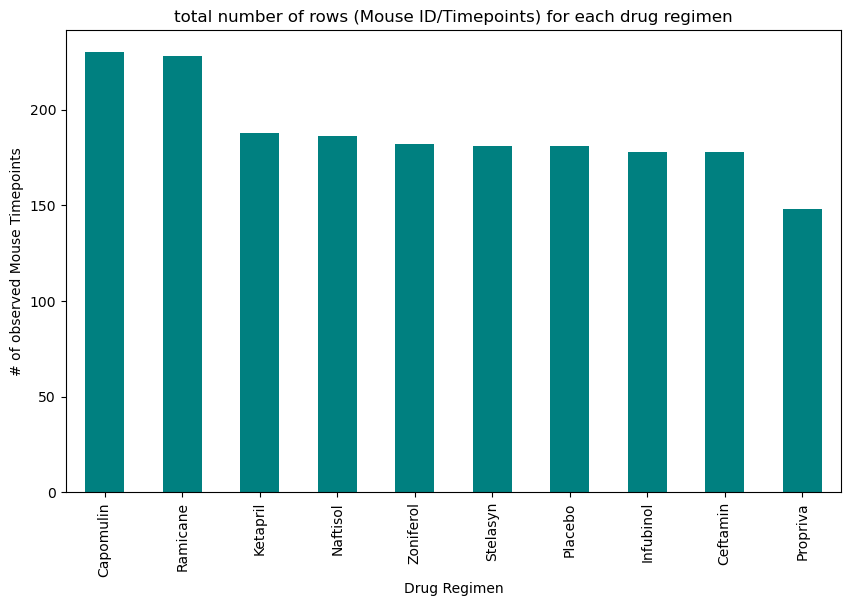

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_regimen_counts = mouse_df['Drug Regimen'].value_counts()

drug_regimen_counts.plot(kind='bar', figsize=(10, 6), color='teal')

plt.title('total number of rows (Mouse ID/Timepoints) for each drug regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Mouse Timepoints')
plt.show()

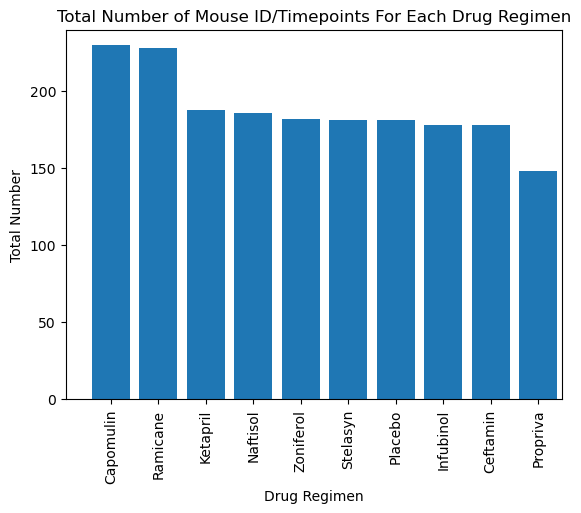

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_regimen_counts = mouse_df['Drug Regimen'].value_counts()
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, alpha = 1, align = "center")

plt.xlim(-0.95, len(drug_regimen_counts.index) -0.50)
plt.ylim(0, max(drug_regimen_counts.values)+10)

plt.title('Total Number of Mouse ID/Timepoints For Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number')
plt.xticks(rotation = "vertical")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

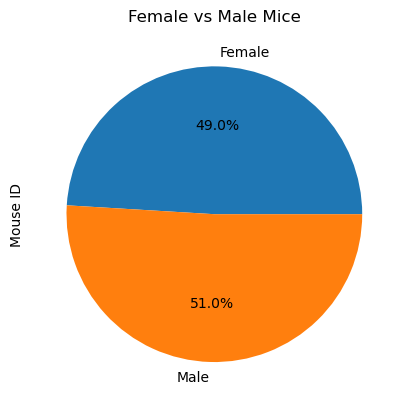

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_counts = mouse_df.groupby(["Sex"]).count()["Mouse ID"]
gender_counts

# Make the pie chart
gender_counts.plot.pie(autopct = "%1.1f%%")
plt.title("Female vs Male Mice")
plt.show

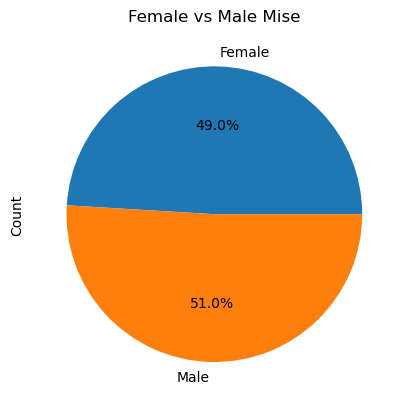

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart

labels = ["Male", "Female"]
sizes = [50.700902, 49.8989395]
plot = gender_counts.plot.pie(y = "Total Count", autopct = "%1.1f%%")
plt.ylabel("Count")
plt.title("Female vs Male Mise")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
mouse_timepoint = mouse_df[mouse_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
mouse_timepoint = mouse_timepoint.sort_values(["Timepoint"], ascending=True)
mouse_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_group = mouse_timepoint.merge(mouse_df, on = ("Mouse ID", "Timepoint"), how = "left")
merged_group

#tumor volume at timepoint
tumor_tp = mouse_timepoint[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
tumor_tp

Drug Regimen Mouse ID  Timepoint  Tumor Volume (mm3)
0       Capomulin     b128          0           45.000000
221      Ceftamin     q483          0           45.000000
220      Ceftamin     o287          0           45.000000
219      Ceftamin     b487          0           45.000000
218      Ceftamin     p438          0           45.000000
...           ...      ...        ...                 ...
1802    Infubinol     e476         45           62.435404
1804    Infubinol     a203         45           67.973419
1806    Infubinol     f345         45           60.918767
1810     Ceftamin     l471         45           67.748662
1890     Ceftamin     p438         45           61.433892

[814 rows x 4 columns]

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

for drug in treatments:
    subset = mouse_df[mouse_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    tumor_vol_data.append(subset)

# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset
quartiles = subset.quantile([0.25, 0.5, 0.75])
IQR = quartiles[0.75] - quartiles[0.25]

    # Determine outliers using upper and lower bounds
lower_bound = quartiles[0.25] - (1.5 * IQR)
upper_bound = quartiles[0.75] * (1.5 * IQR)
outliers = subset[(subset < lower_bound) | (subset > upper_bound)]


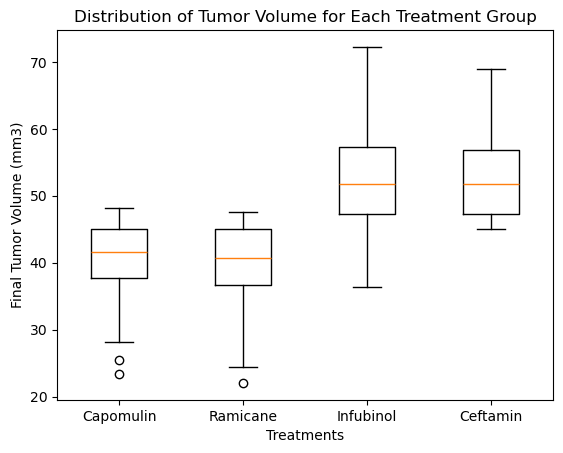

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments)
plt.title("Distribution of Tumor Volume for Each Treatment Group") 
plt.xlabel("Treatments") 
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

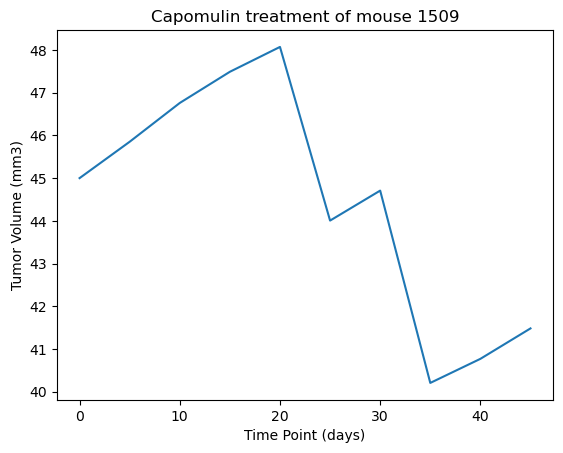

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#mouse_study = mouse_df [(mouse_df ["Mouse ID"] == "1509") & (mouse_df ["Drug Regimen"] == "Capomulin")][["Timepoint", "Tumor Volume (mm3)"]]

mouse_data = mouse_df [(mouse_df ['Mouse ID'] == 'l509') & (mouse_df ['Drug Regimen'] == 'Capomulin')][['Timepoint', 'Tumor Volume (mm3)']]

plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of mouse 1509')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

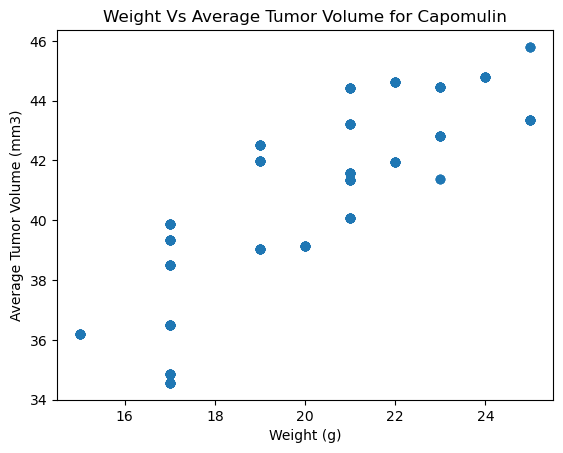

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_regimen = mouse_df[mouse_df["Drug Regimen"] == "Capomulin"]
avg_tumor_vol = capomulin_regimen.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

mouse_df = pd.merge(avg_tumor_vol, capomulin_regimen [["Mouse ID", "Weight (g)"]], on = "Mouse ID")

plt.scatter(mouse_df["Weight (g)"],mouse_df["Tumor Volume (mm3)"])
plt.title("Weight Vs Average Tumor Volume for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.83


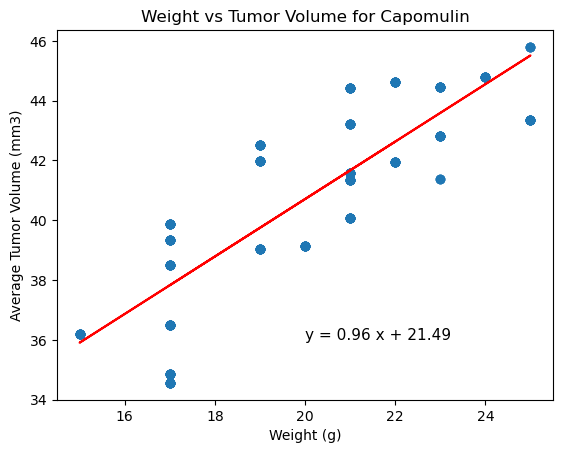

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
#correlation_coefficient = st.pearsonr(mouse_df ['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])

correlation_coefficient =  st.pearsonr(mouse_df['Weight (g)'],mouse_df['Tumor Volume (mm3)'])

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation_coefficient[0],2)}")



(slope, intercept,rvalue, pvalue, stderr)=st.linregress(mouse_df["Weight (g)"],mouse_df["Tumor Volume (mm3)"])
regress_values=mouse_df["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"



plt.scatter(mouse_df["Weight (g)"],mouse_df["Tumor Volume (mm3)"])
plt.plot(mouse_df["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=11)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()
